In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

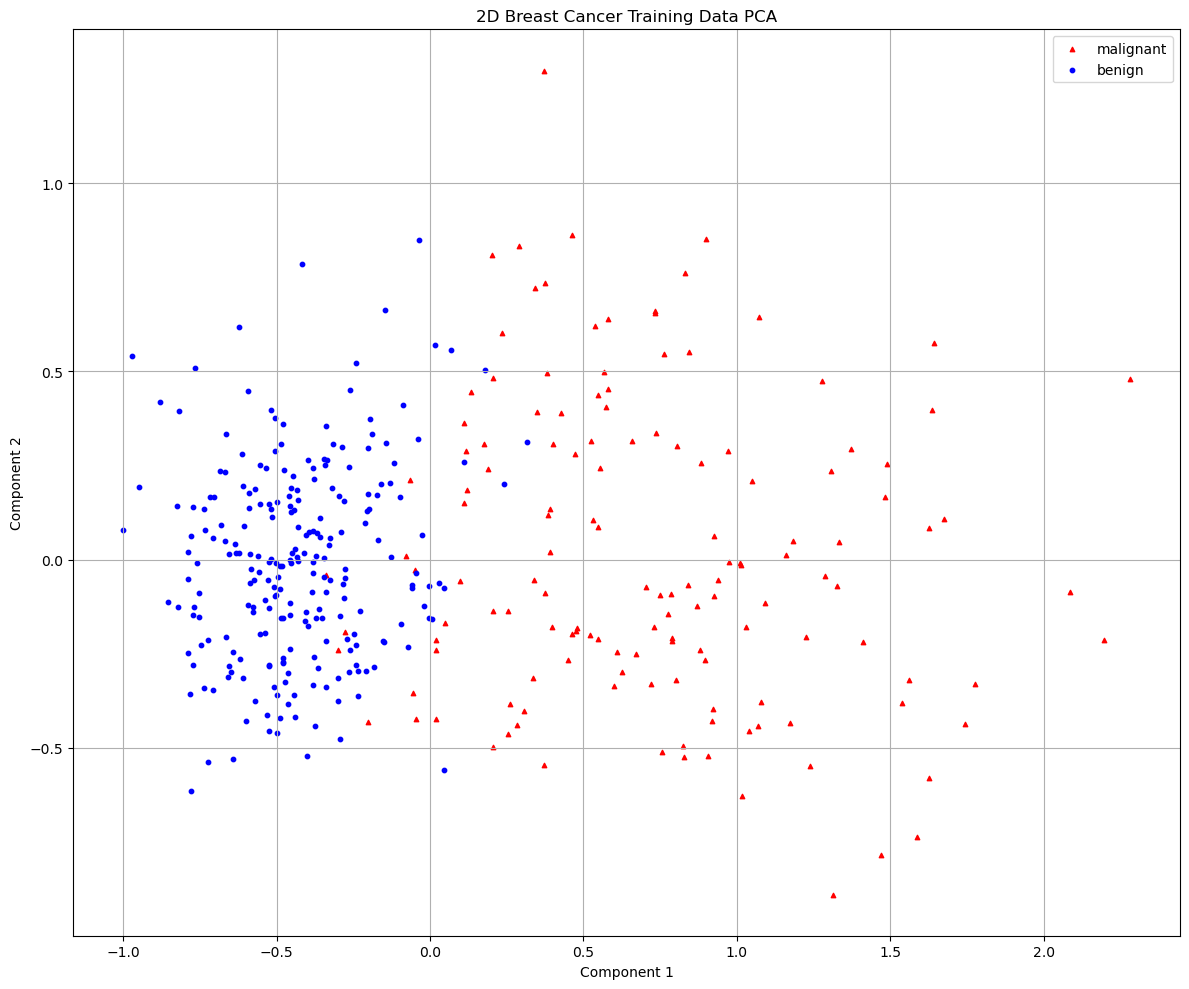

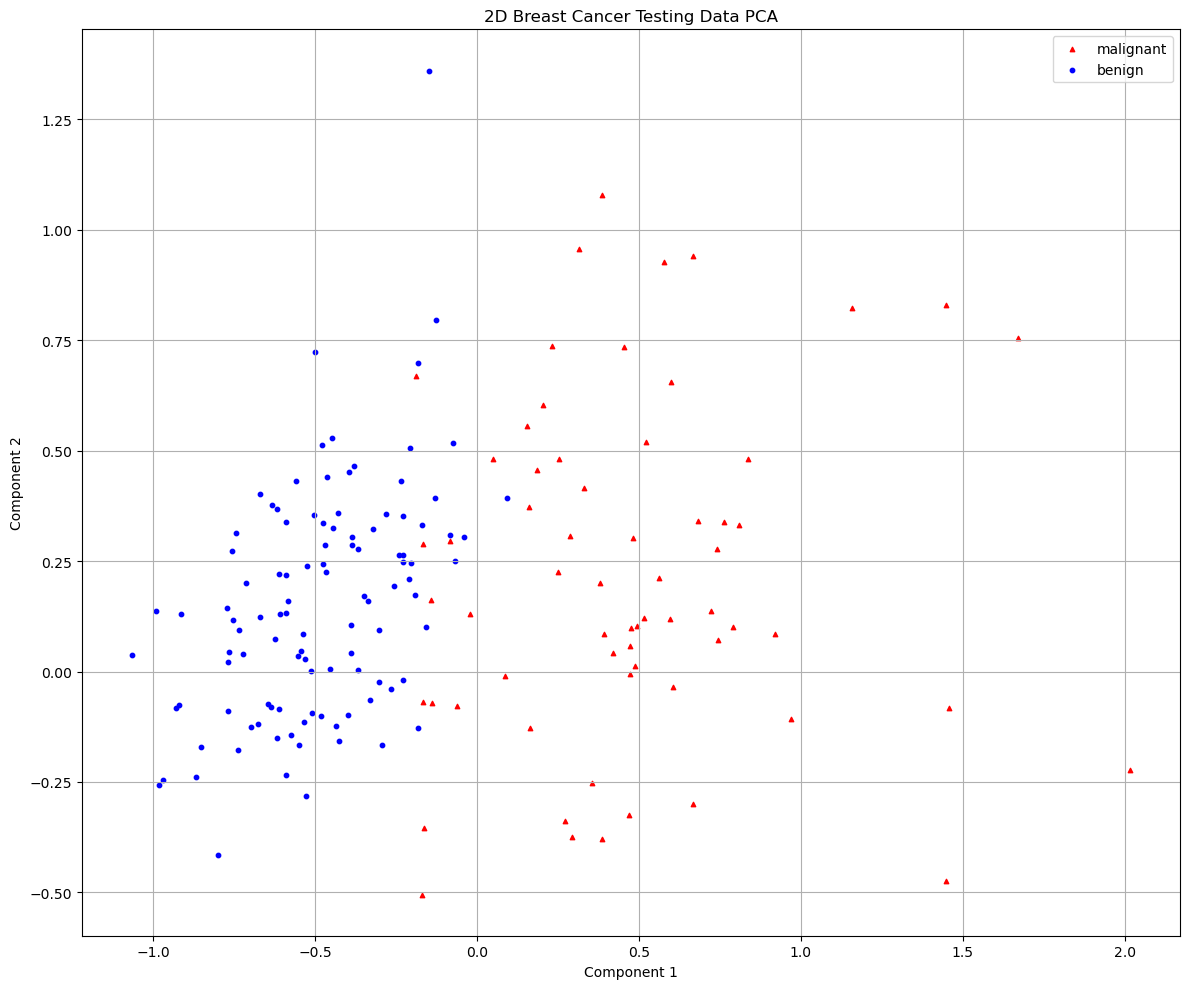

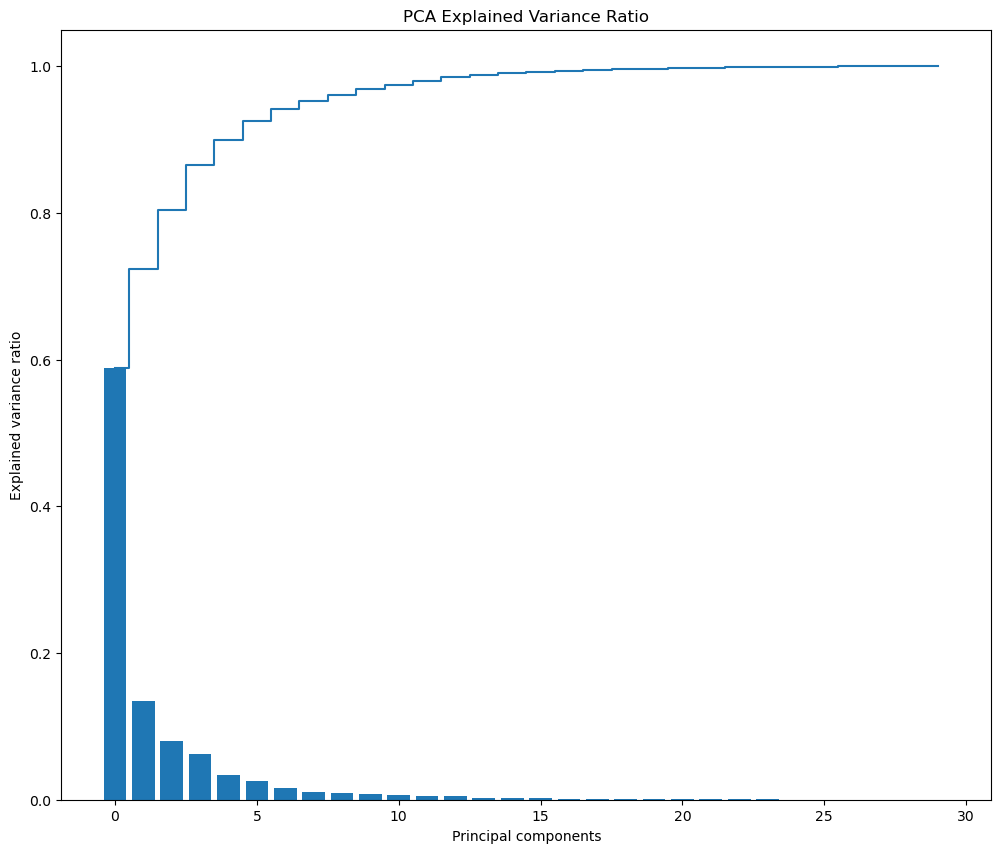

In [2]:
outlier_params = {'n_neighbors': 20}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'loc', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

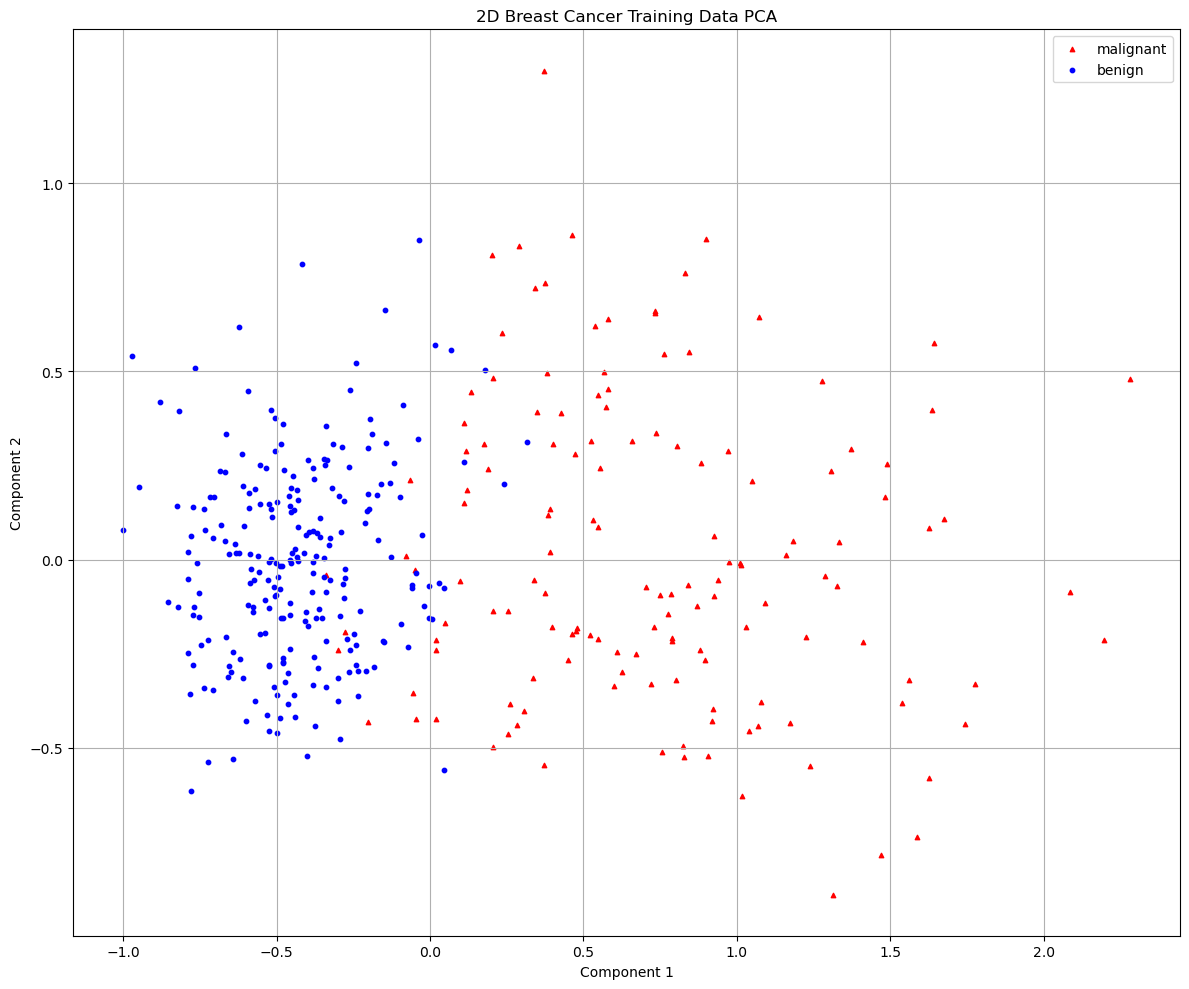

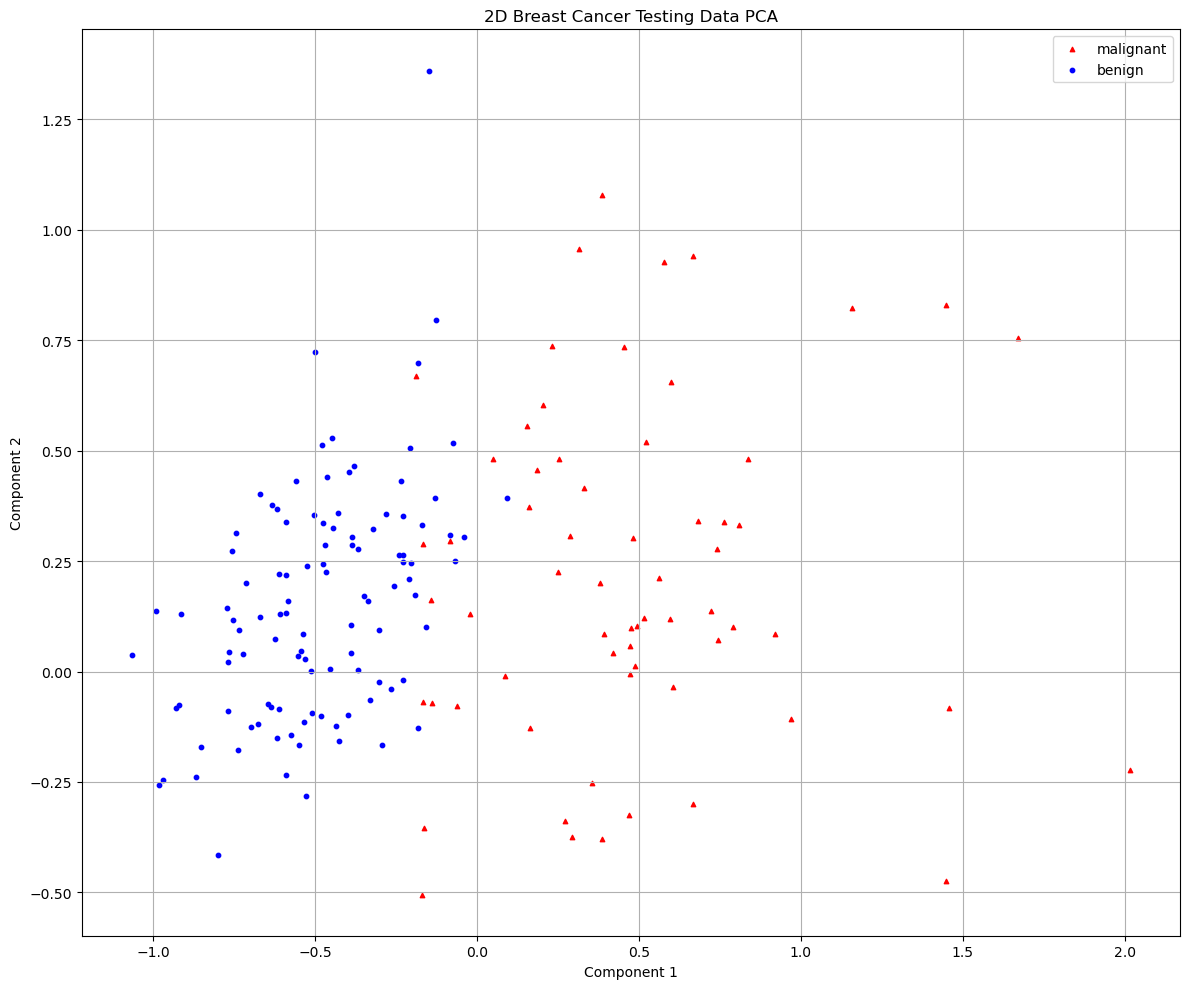

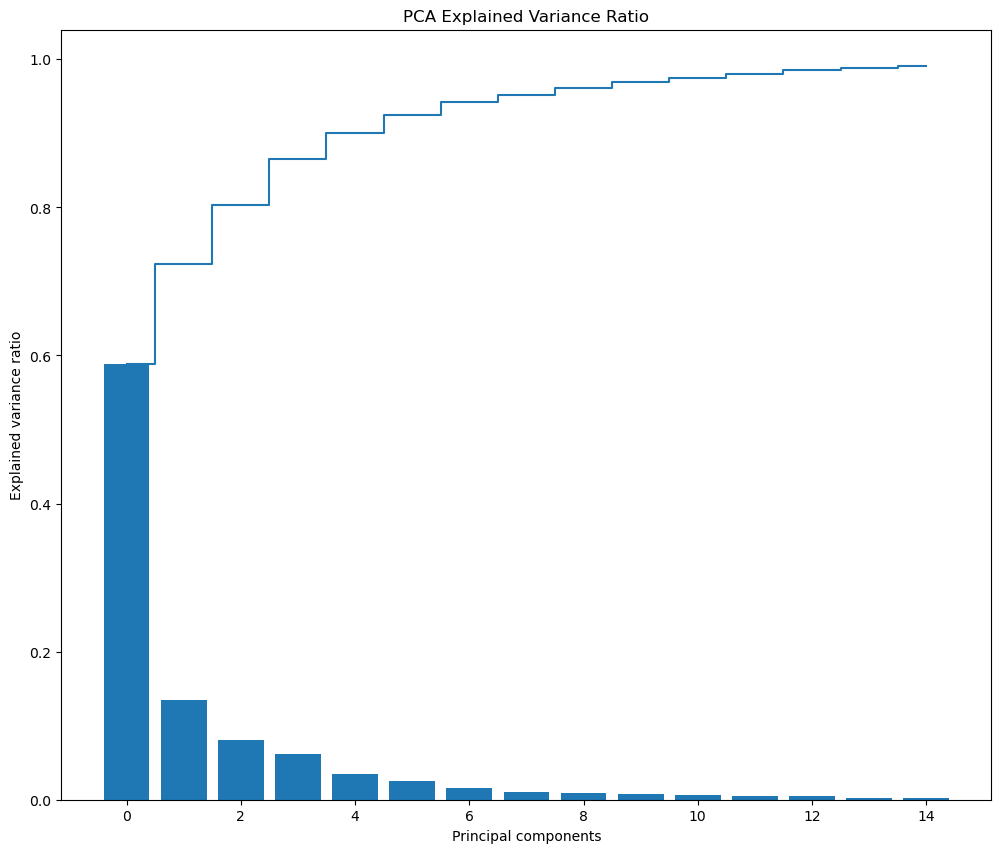

[I 2025-04-27 05:27:56,166] A new study created in memory with name: no-name-adeb71dc-5439-4a03-9205-605959d30d50
[I 2025-04-27 05:28:01,339] Trial 0 finished with value: 0.9421052631578947 and parameters: {'n_estimators': 1848, 'learning_rate': 0.0010270109260338734, 'num_leaves': 52, 'max_depth': 12, 'min_child_samples': 16, 'subsample': 0.518248613936001, 'colsample_bytree': 0.44524528986894774, 'reg_alpha': 0.00027459836335652117, 'reg_lambda': 4.986036786044353}. Best is trial 0 with value: 0.9421052631578947.
[I 2025-04-27 05:28:05,959] Trial 1 finished with value: 0.9605263157894737 and parameters: {'n_estimators': 7085, 'learning_rate': 0.011297917052674224, 'num_leaves': 30, 'max_depth': 12, 'min_child_samples': 14, 'subsample': 0.7640715244252552, 'colsample_bytree': 0.7839986056030914, 'reg_alpha': 4.690342447109007, 'reg_lambda': 1.4731962101927218e-05}. Best is trial 1 with value: 0.9605263157894737.
[I 2025-04-27 05:28:07,447] Trial 2 finished with value: 0.96315789473684

Best trial:
Accuracy: 0.9710526315789474
Best hyperparameters:  {'n_estimators': 8789, 'learning_rate': 0.25041496930654716, 'num_leaves': 55, 'max_depth': 12, 'min_child_samples': 68, 'subsample': 0.8044541019613674, 'colsample_bytree': 0.9532720545592382, 'reg_alpha': 0.0002587313786946502, 'reg_lambda': 0.0011826619009598239}


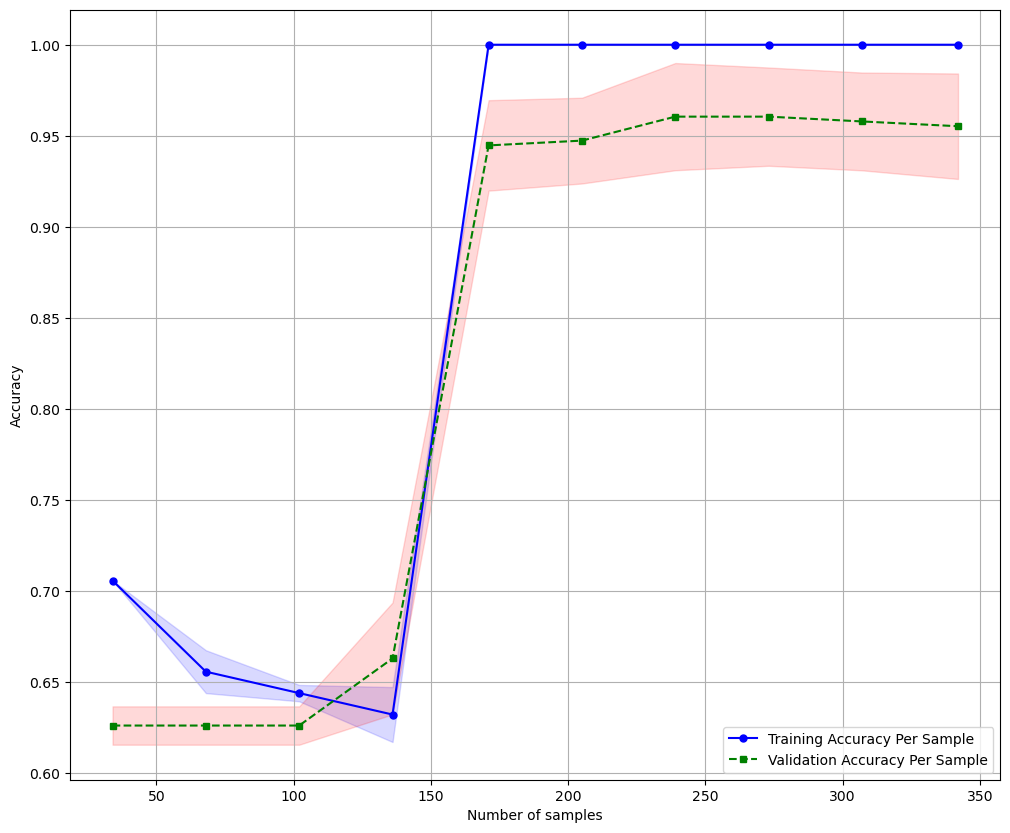

Confusion Matrix
[[ 54  10]
 [  0 107]]
Accuracy: 0.9415, Precision: 0.9145, Recall: 1.0000, F1: 0.9554, AUC: 0.9917


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)